In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

antenna_gain = pd.read_csv("Yagi_phi90.txt", skiprows=[x for x in range(4)], sep='\t')
antenna_gain

,Theta,E Total. dB
0,-3.141593,-4.601160
1,-3.089233,-4.753497
2,-3.036873,-5.219791
3,-2.984513,-5.907615
4,-2.932153,-6.650730
...,...,...
116,2.932153,-6.906965
117,2.984513,-6.055990
118,3.036873,-5.303517
119,3.089233,-4.792234


<AxesSubplot:xlabel='Theta', ylabel='E Total. dB'>

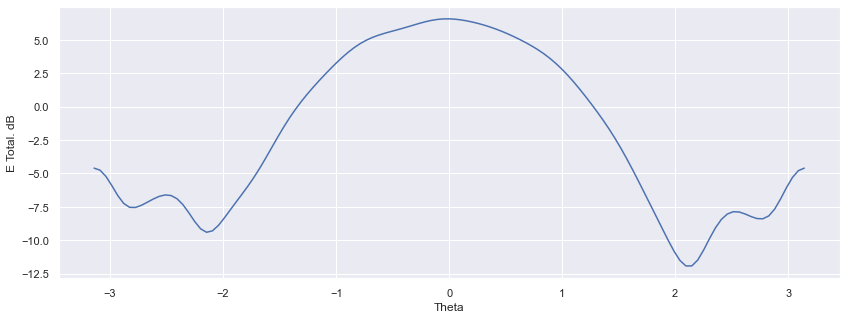

In [26]:
sns.set(rc={'figure.figsize':(14,5)})
sns.lineplot(x=antenna_gain['Theta'], y=antenna_gain['E Total. dB'])

In [27]:
df = pd.read_excel('Imaging_position_relative_angle.xlsx', skiprows=[x for x in range(22)])
coordinate = pd.read_excel('Imaging_position_relative_angle.xlsx', skiprows=[x for x in range(21, 1000)], index_col=0)

In [28]:
coordinate.drop(labels='theta', axis=1, inplace=True)
coordinate

,x,y
1,0.0,0.0
2,0.0,0.3
3,0.0,0.6
4,0.0,0.9
5,0.0,1.2
6,0.0,1.5
7,0.3,1.5
8,0.6,1.5
9,0.9,1.5
10,1.2,1.5


In [29]:
df = pd.read_excel('Imaging_position_relative_angle.xlsx', skiprows=[x for x in range(22)])
df.drop(labels='Unnamed: 2', axis=1, inplace=True)
df.rename(columns={'Unnamed: 3': 'angle'}, inplace=True)

df['angle'] = df['angle'].apply(lambda x: x*np.pi/180)

df

,TX,RX,angle
0,1,1,NaN
1,1,2,0.785398
2,1,3,0.785398
3,1,4,0.785398
4,1,5,0.785398
...,...,...,...
395,20,16,-1.570796
396,20,17,-1.570796
397,20,18,-1.570796
398,20,19,-1.570796


In [30]:
answer = []
for angle in df['angle']:
    if np.isnan(angle):
        closest = float('nan')
    else:
        closest = min(antenna_gain['Theta'], key=lambda x:abs(x-angle))
    answer.append(closest)
df['angle'] = answer

df

,TX,RX,angle
0,1,1,NaN
1,1,2,0.785398
2,1,3,0.785398
3,1,4,0.785398
4,1,5,0.785398
...,...,...,...
395,20,16,-1.570796
396,20,17,-1.570796
397,20,18,-1.570796
398,20,19,-1.570796


In [31]:
gains = []

for i in range(len(df)):
    try:
        gain = float(antenna_gain[antenna_gain['Theta'] == df['angle'].iloc[i]]['E Total. dB'])
    except:
        gain = np.nan

    gains.append(gain)
df['gain'] = gains

df


,TX,RX,angle,gain
0,1,1,NaN,NaN
1,1,2,0.785398,4.259584
2,1,3,0.785398,4.259584
3,1,4,0.785398,4.259584
4,1,5,0.785398,4.259584
...,...,...,...,...
395,20,16,-1.570796,-3.074525
396,20,17,-1.570796,-3.074525
397,20,18,-1.570796,-3.074525
398,20,19,-1.570796,-3.074525


In [32]:
import math

distances = []
for i in coordinate.index:
    # print(f"{i}\t{coordinate['x'].iloc[i-1]}\t{coordinate['y'].iloc[i-1]}")
    for j in coordinate.index:
        distances.append(math.dist([coordinate['x'].iloc[i-1], coordinate['y'].iloc[i-1]], [coordinate['x'].iloc[j-1], coordinate['y'].iloc[j-1]]))

df['distance'] = distances
df

,TX,RX,angle,gain,distance
0,1,1,NaN,NaN,0.0
1,1,2,0.785398,4.259584,0.3
2,1,3,0.785398,4.259584,0.6
3,1,4,0.785398,4.259584,0.9
4,1,5,0.785398,4.259584,1.2
...,...,...,...,...,...
395,20,16,-1.570796,-3.074525,1.2
396,20,17,-1.570796,-3.074525,0.9
397,20,18,-1.570796,-3.074525,0.6
398,20,19,-1.570796,-3.074525,0.3


In [33]:
from functions import *

friis_equation_result = []
for i in df.index:
    Gt = df.iloc[i]['gain']
    try:
        Gr = float(df[(df['TX']==df.iloc[i]['RX']) & (df['RX']==df.iloc[i]['TX'])]['gain'])
    except:
        Gr = np.nan

    d = df.iloc[i]['distance']
    result = friis_transmission_equation(7, Gt, Gr, d, 2.3e9)
    friis_equation_result.append(result)

df['friis_equation_result'] = friis_equation_result

df

c:\Users\lowong\OneDrive - HKUST Connect\Desktop\PLUTOSDR\functions.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  Pr = Pt + Gt + Gr + 20*np.log10((lamda/(4*np.pi*d)))


,TX,RX,angle,gain,distance,friis_equation_result
0,1,1,NaN,NaN,0.0,NaN
1,1,2,0.785398,4.259584,0.3,-21.033694
2,1,3,0.785398,4.259584,0.6,-27.054294
3,1,4,0.785398,4.259584,0.9,-30.576119
4,1,5,0.785398,4.259584,1.2,-33.074894
...,...,...,...,...,...,...
395,20,16,-1.570796,-3.074525,1.2,-33.074894
396,20,17,-1.570796,-3.074525,0.9,-38.728852
397,20,18,-1.570796,-3.074525,0.6,-35.207027
398,20,19,-1.570796,-3.074525,0.3,-29.186427


In [34]:
friis_equation_result = np.reshape(friis_equation_result, (20, 20))
# friis_equation_result

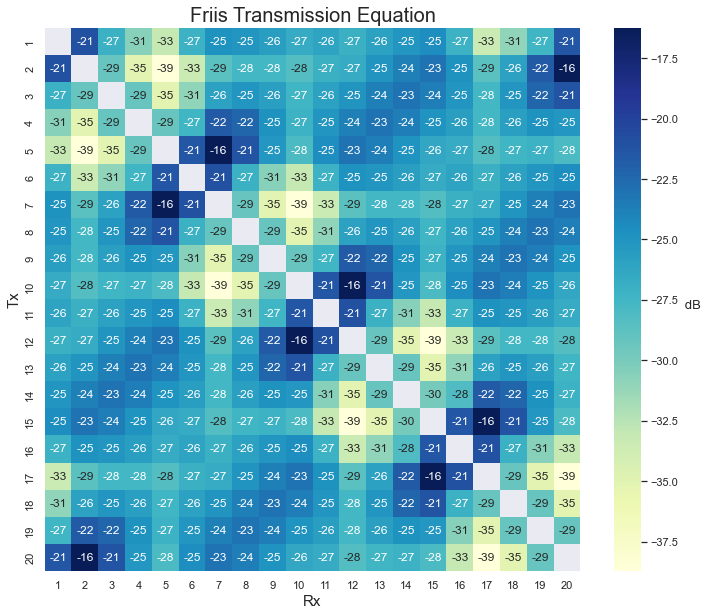

In [35]:
sns.set(rc={'figure.figsize':(12,10)})

ax =sns.heatmap(friis_equation_result, cmap="YlGnBu", annot=True, fmt=".0f")
ax.set_xticklabels([x+1 for x in range(20)])
ax.set_yticklabels([x+1 for x in range(20)])
ax.collections[0].colorbar.set_label("      dB", rotation=0, fontdict={'fontsize':13})
ax.set_xlabel('Rx', fontdict={'fontsize':15})
ax.set_ylabel('Tx', fontdict={'fontsize':15})
ax.set_title(f'Friis Transmission Equation', fontdict={'fontsize':20})

plt.show()

In [36]:
parameters = {
        'sample_rate': 1e6,  # Hz
        'num_samples': 1000,  # number of samples per call to rx()
        'center_freq': 2.3e9,  # Hz 2.4e9
        'bandwidth': 1e4,  # Hz
        'transmitter_attenuation': 0,  # dB
        'receiver_gain': 36,  # dB

        'size': 1.5,
        'num_iter': 10,
        # 'device_indices': [1, 6, 11, 16],
        'device_indices': [x+1 for x in range(20)]

    }

result = {}

for dir in os.scandir('result'):
    if dir.is_dir():
        dataset = np.load(dir.path + "\dataset.npy")
        dataset = np.absolute(dataset.mean(axis=3)).mean(axis=0)
        # dataset = np.absolute(np.median(dataset, axis=3)).mean(axis=0)
        for tx in range(dataset.shape[0]):
            for rx in range(dataset.shape[1]):
                dataset[tx][rx] = actual_power(dataset[tx][rx], parameters['receiver_gain'])

        result[dir.name] = dataset

In [37]:
def plot_error(date):
    ax = sns.heatmap((result[date]-friis_equation_result), cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.1, cbar_kws={'label': 'dB'})
    ax.set_xticklabels([x+1 for x in range(20)])
    ax.set_yticklabels([x+1 for x in range(20)])
    ax.collections[0].colorbar.set_label("      dB", rotation=0, fontdict={'fontsize':13})
    ax.set_xlabel('Rx', fontdict={'fontsize':15})
    ax.set_ylabel('Tx', fontdict={'fontsize':15})
    ax.set_title(f'Error between Theoretical and Experimental Results at {date}', fontdict={'fontsize':20})
    # plt.savefig(f"result\\{date}.png")
    plt.show()

# for key in result.keys():
#     plot_error(key)

In [38]:
standard_deviation = np.zeros_like(list(result.values())[0])
for tx in range(20):
    for rx in range(20):
        if tx == rx:
            standard_deviation[tx][rx] = np.nan
        else:
            standard_deviation[tx][rx] = np.std([result[key][tx][rx] for key in result.keys()])


In [46]:
ax = sns.heatmap(standard_deviation, cmap="YlGnBu", annot=True, fmt=".1f")
ax.set_xticklabels([x+1 for x in range(20)])
ax.set_yticklabels([x+1 for x in range(20)])
ax.set_xlabel('Rx', fontdict={'fontsize':15})
ax.set_ylabel('Tx', fontdict={'fontsize':15})
ax.set_title(f"Standard Deviation(From Plots)", fontdict={'fontsize':20})
plt.show()

In [40]:
for key, value in result.items():
    print(f"{key}: {value[3][6]:.1f}dB")

19Oct1430: -27.7dB
19Oct1431: -27.8dB
19Oct1432: -27.7dB
19Oct1433: -27.7dB
19Oct1434: -27.8dB
19Oct1435: -27.8dB
19Oct1436: -27.8dB
19Oct1437: -27.8dB
19Oct1438: -27.8dB
19Oct1439: -27.9dB
19Oct1440: -27.8dB
19Oct1441: -27.8dB


In [41]:
# from apscheduler.schedulers.blocking import BlockingScheduler
# from main import main


# scheduler = BlockingScheduler()
# scheduler.add_job(main, 'interval', minutes=2)
# scheduler.start()

In [42]:
from functions import *

parameters = {
    'sample_rate': 1e6,  # Hz
    'num_samples': 1000,  # number of samples per call to rx()
    'center_freq': 2.35e9,  # Hz 2.4e9
    'bandwidth': 10,  # Hz
    'transmitter_attenuation': 0,  # dB
    'receiver_gain': 34,  # dB

    'size': 1.5,
    'num_iter': 10,
    # 'device_indices': [1, 6, 11, 16],
    'device_indices': [x+1 for x in range(20)],

    'time': time.strftime('%d%b%H%M', time.localtime())
}


In [43]:
def test_data_collection():
    parameters['receiver_gain'] = 0
    signal = generate_signal()

    devices = init_devices(parameters)

    dataset = []

    for i in tqdm(range(65)):
        devices[0].transmit(signal)
        # devices[1].transmit(signal)
        receive_concurrently(devices=devices)
        data = []
        for j in range(20):
            data.append(devices[j].data)
        dataset.append(data)

        for j in range(20):
            parameters['receiver_gain'] = i
            devices = init_devices(parameters)


        devices[0].stop_transmit()
        # devices[1].stop_transmit()
        
    
    dataset = np.array(dataset)
    np.save(os.path.join('result', f"{time.strftime('%d%b%H%M', time.localtime())}"), dataset)

In [44]:
# test_data_collection()

In [45]:
# import plotly.graph_objects as go
# fig = go.Figure()

# for i in range(20):
#     fig.add_trace(go.Scatter(
#         y = np.abs(np.mean(np.load(os.path.join('result', '12Oct1106.npy')),axis=2)).transpose()[i],
#         name = f"Pluto{i+1}"       # this sets its legend entry
#     ))

# fig.update_layout(
#         title=f"Pluto Saturation Test(Wireless)",
#         xaxis_title="Receiver Gain(dB)",
#         yaxis_title="Magnitude",
#         yaxis_range=[1,3000],
#         font=dict(
#             family="Courier New, monospace",
#             size=18,
#             color="RebeccaPurple"
#         ),
        
#         xaxis = dict(
#             tickmode = 'linear',
#             dtick = 8
#         )
#     )

# fig.show()
# fig.write_html("saturation_test_wireless.html")